In [ ]:
## Prediction of air quality in India by the content of SO2, NO2 and suspended particles.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
df = pd.read_csv("data.csv", encoding='unicode_escape')
df

C:\Users\ankur\AppData\Local\Temp\ipykernel_9516\2990750530.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='unicode_escape')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(435742, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [8]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [9]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

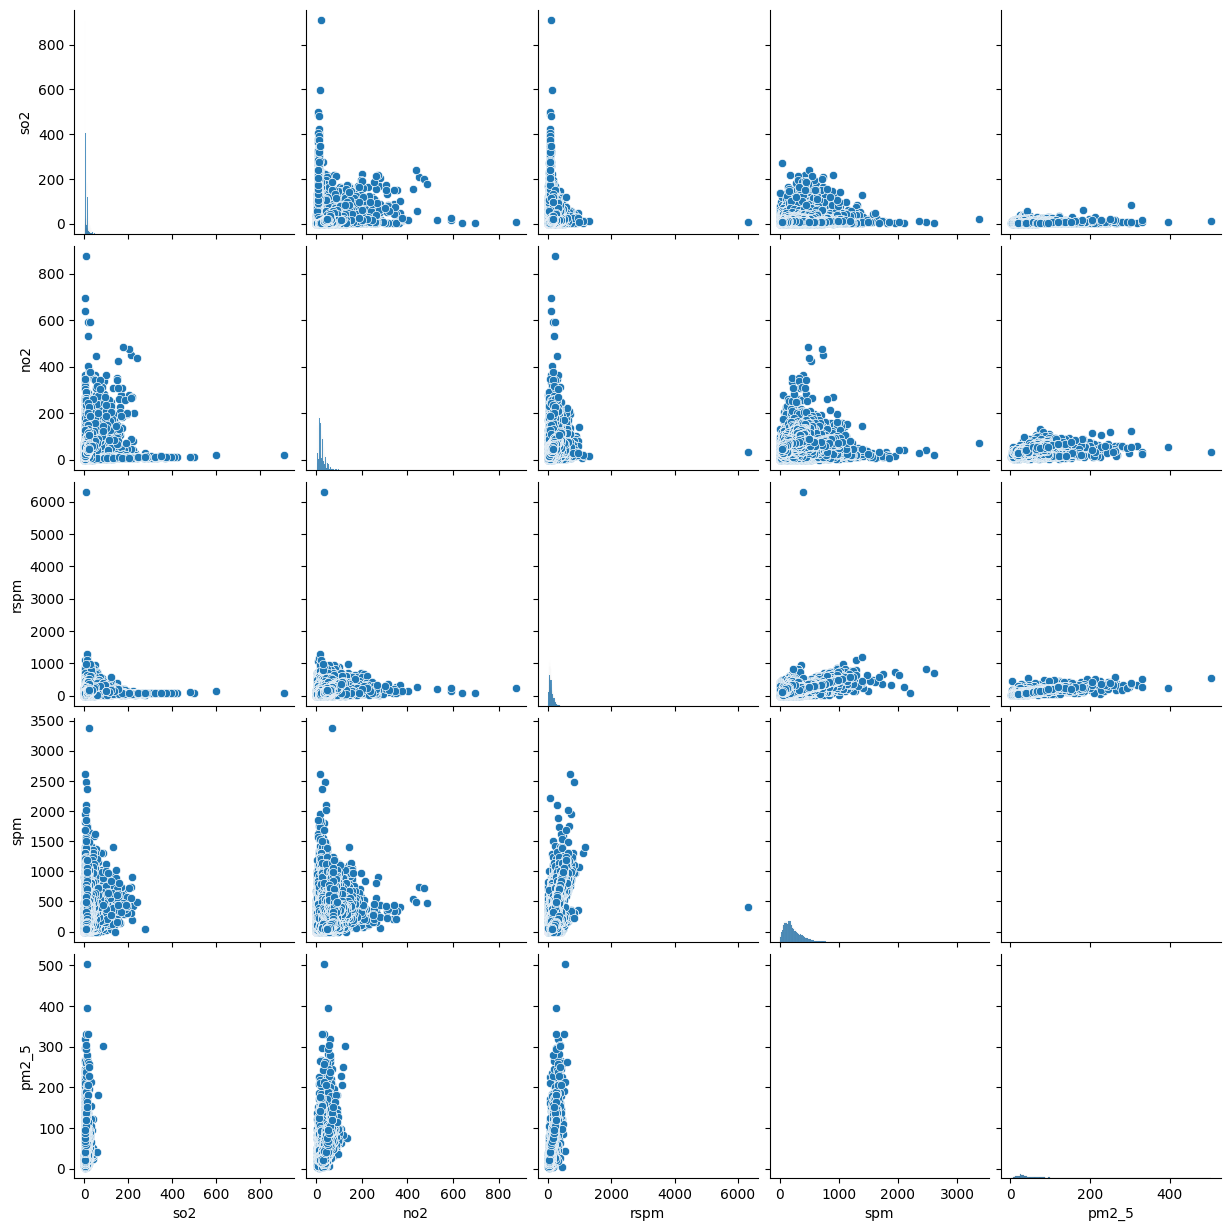

In [10]:
sns.pairplot(data=df)

In [11]:
df['state'].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

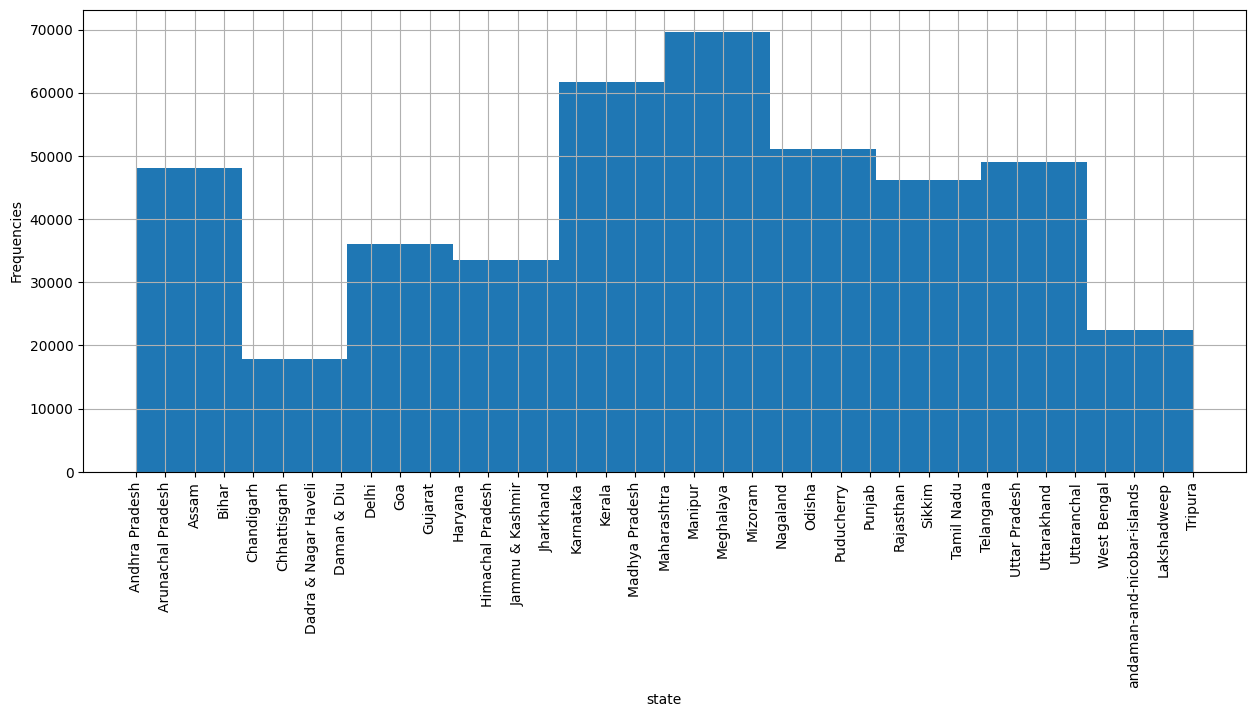

In [12]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

In [13]:
df['agency'].value_counts()

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

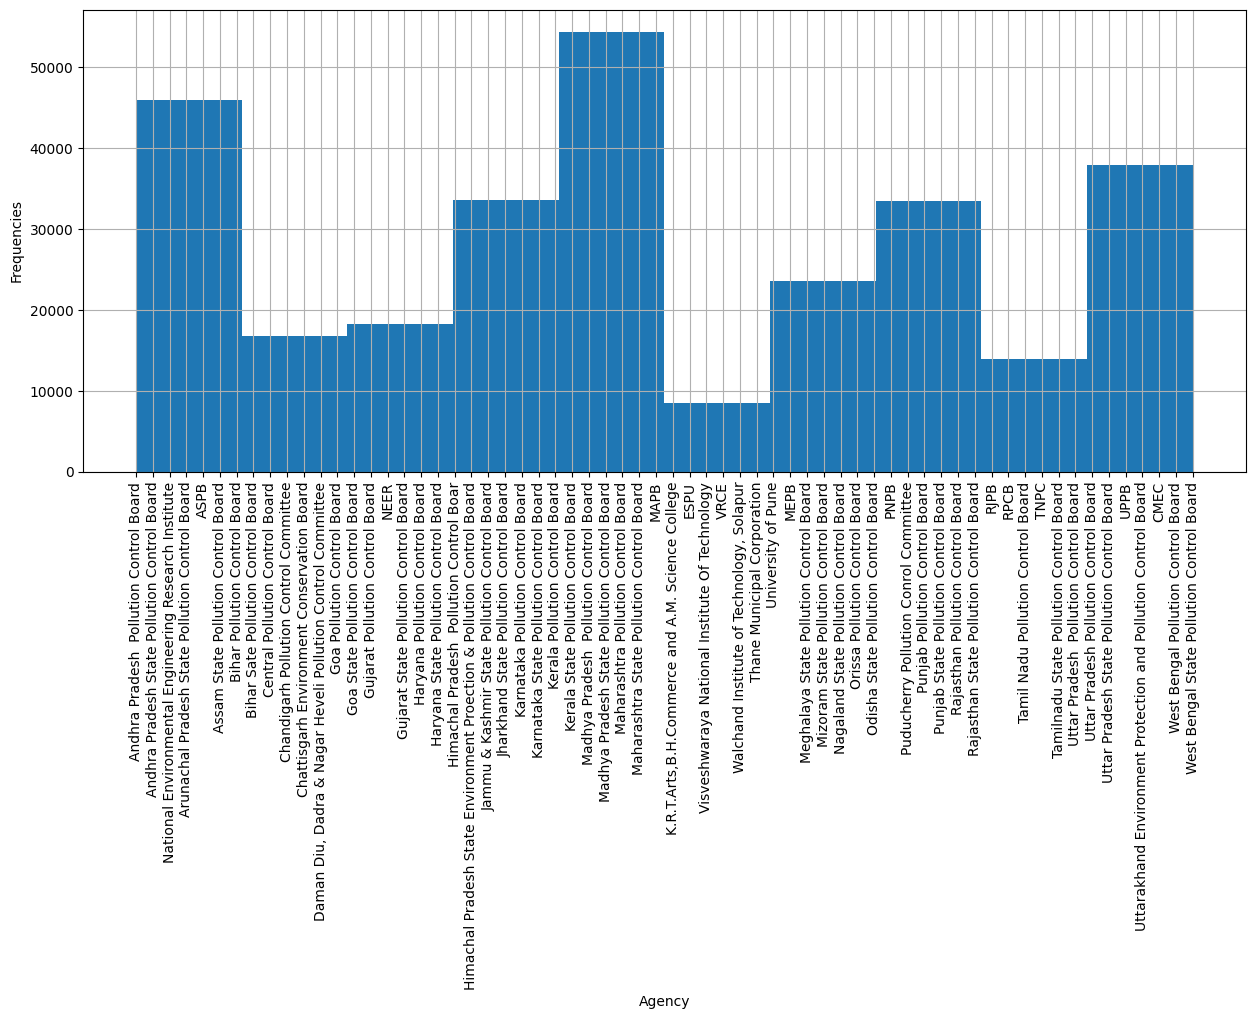

In [14]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

<Axes: xlabel='state', ylabel='so2'>

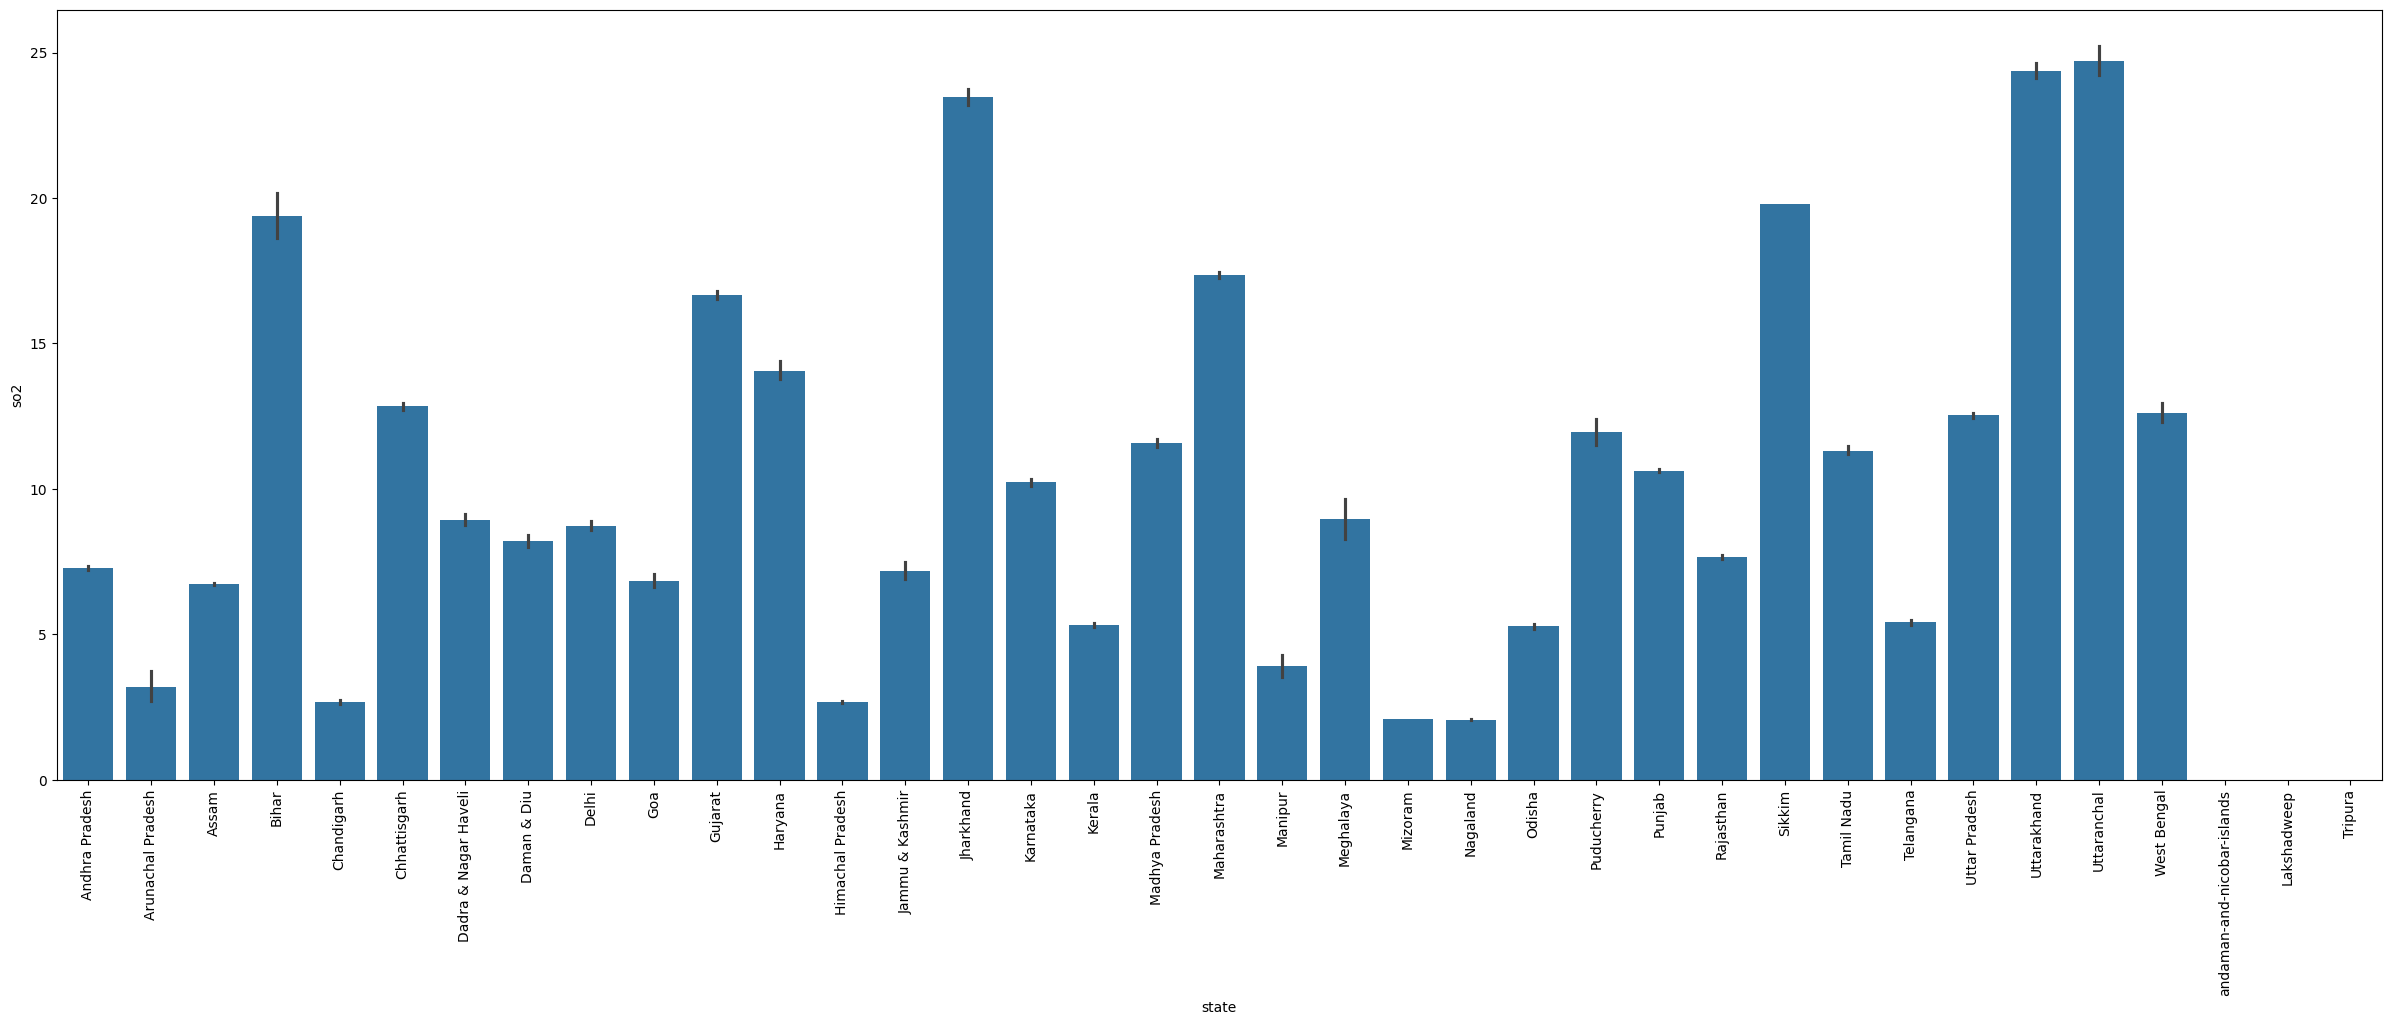

In [15]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)

In [16]:
plt.rcParams['figure.figsize']=(30,10)

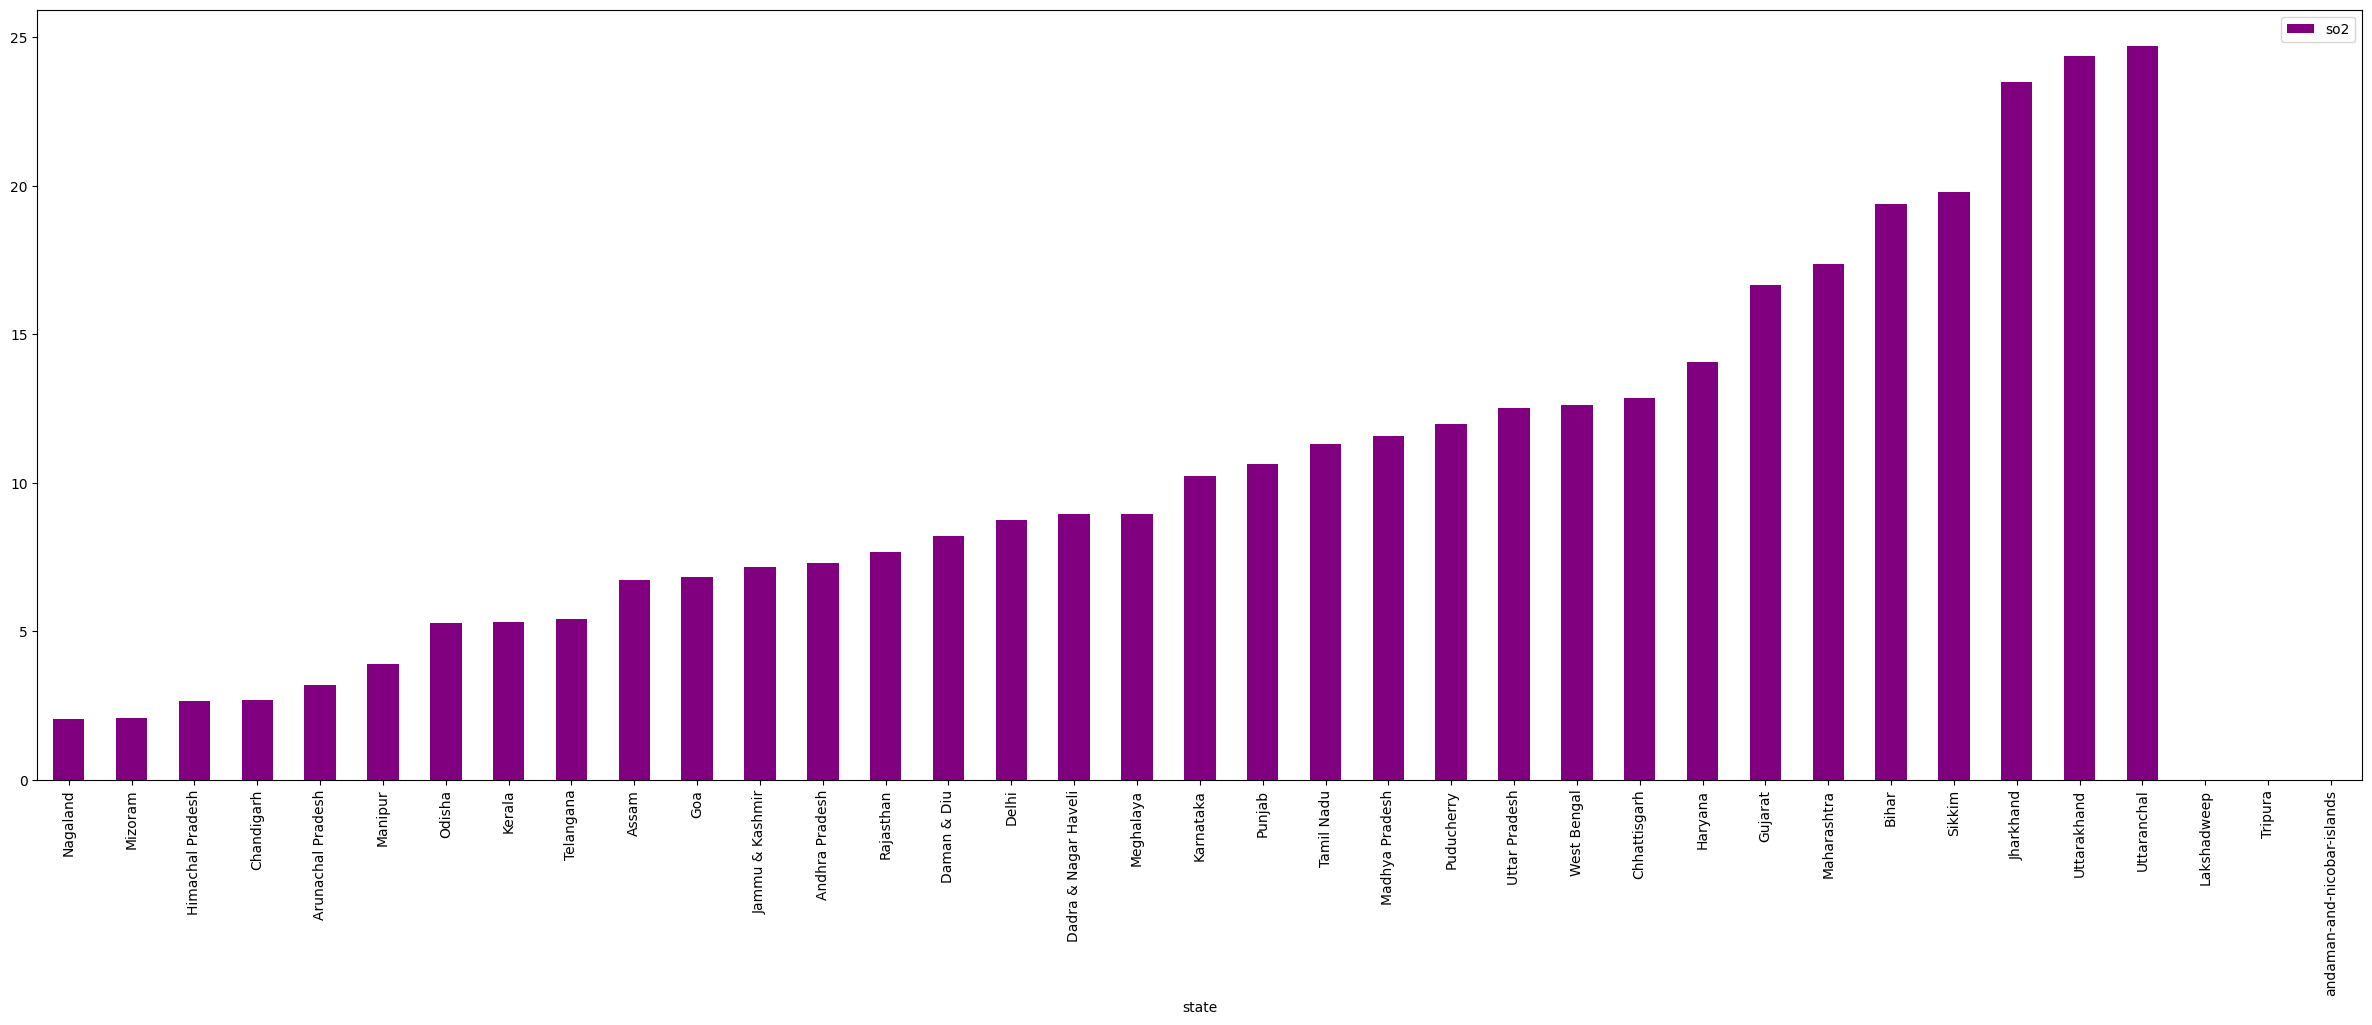

In [17]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

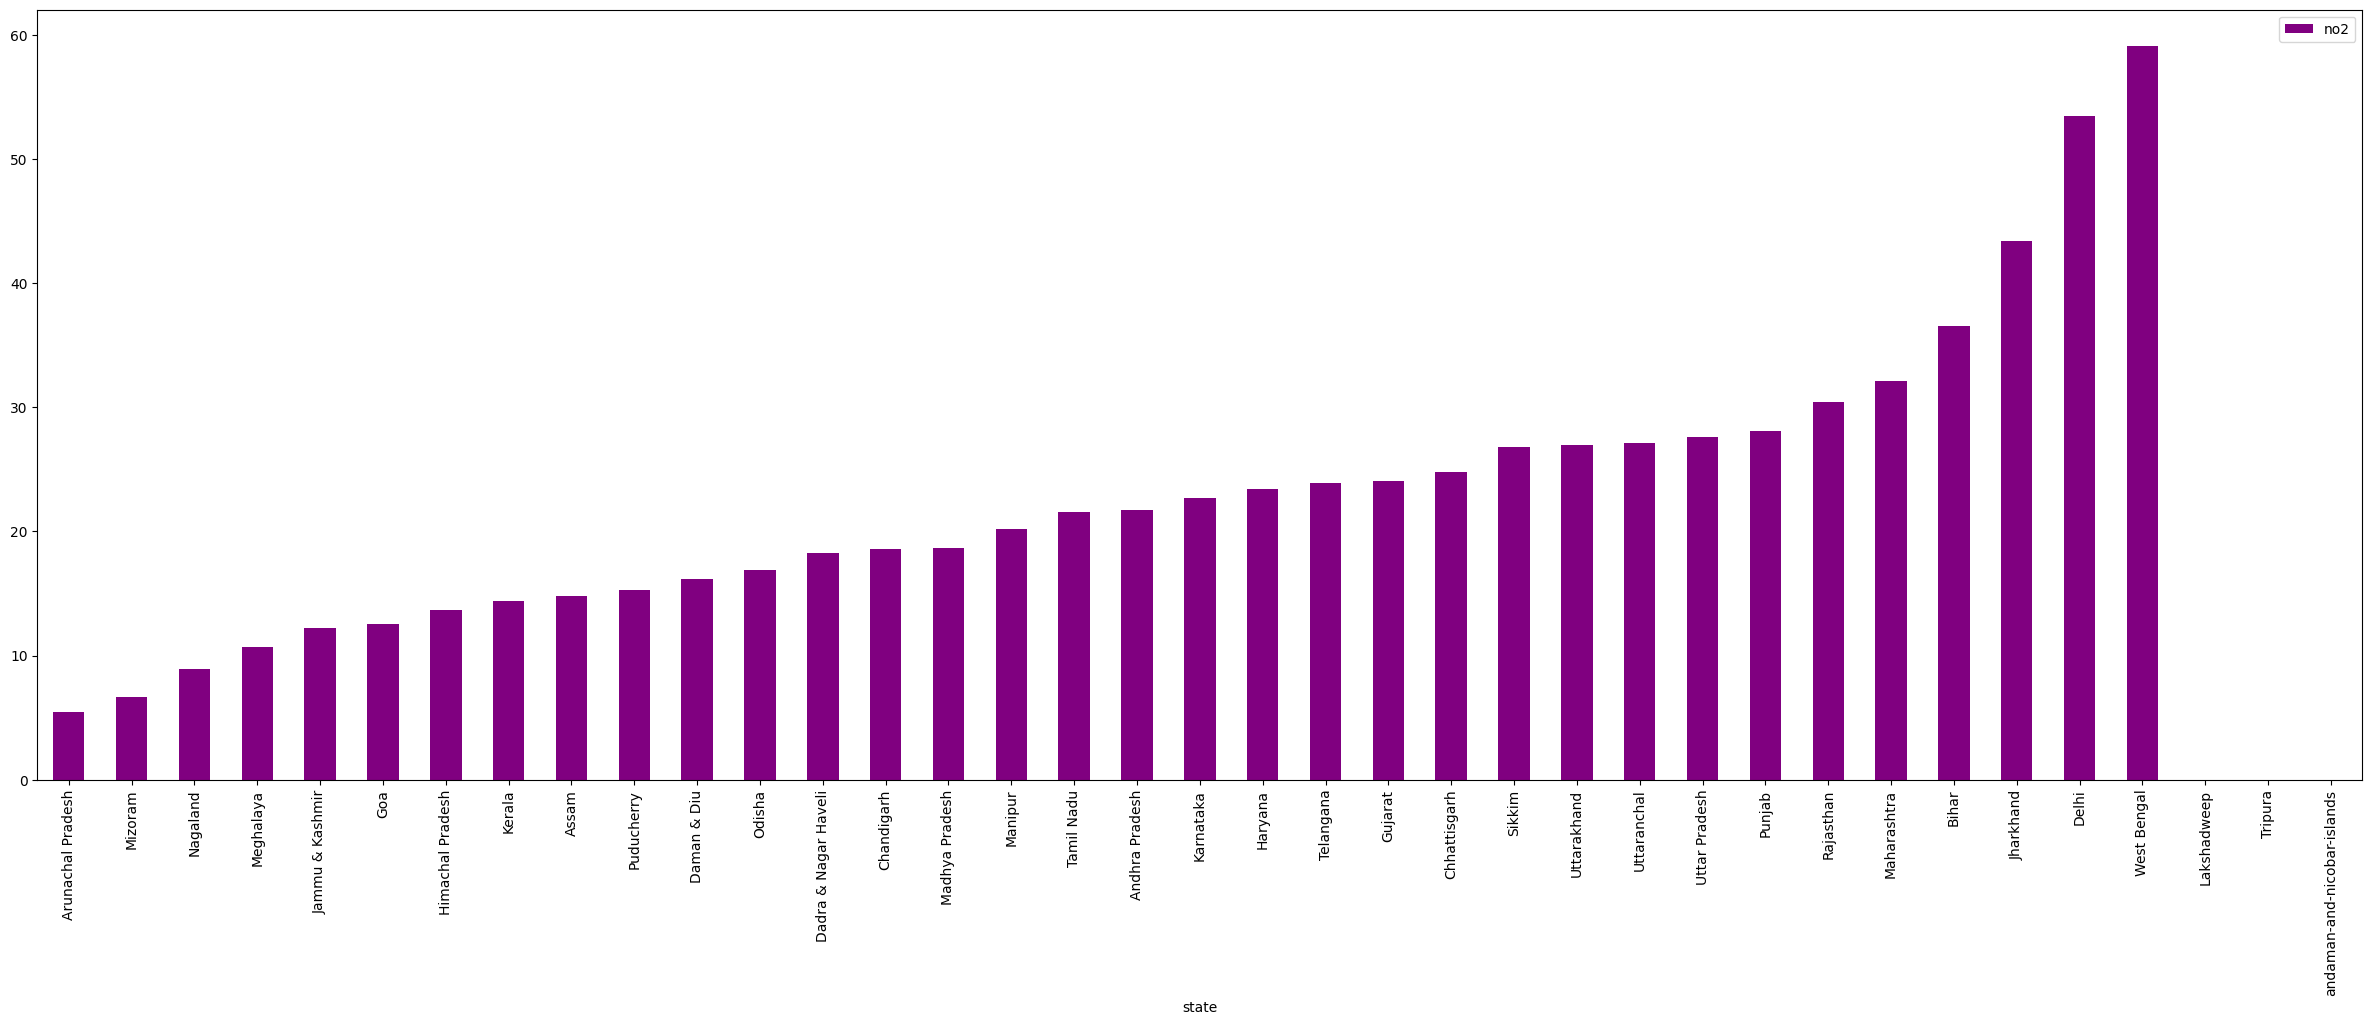

In [18]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

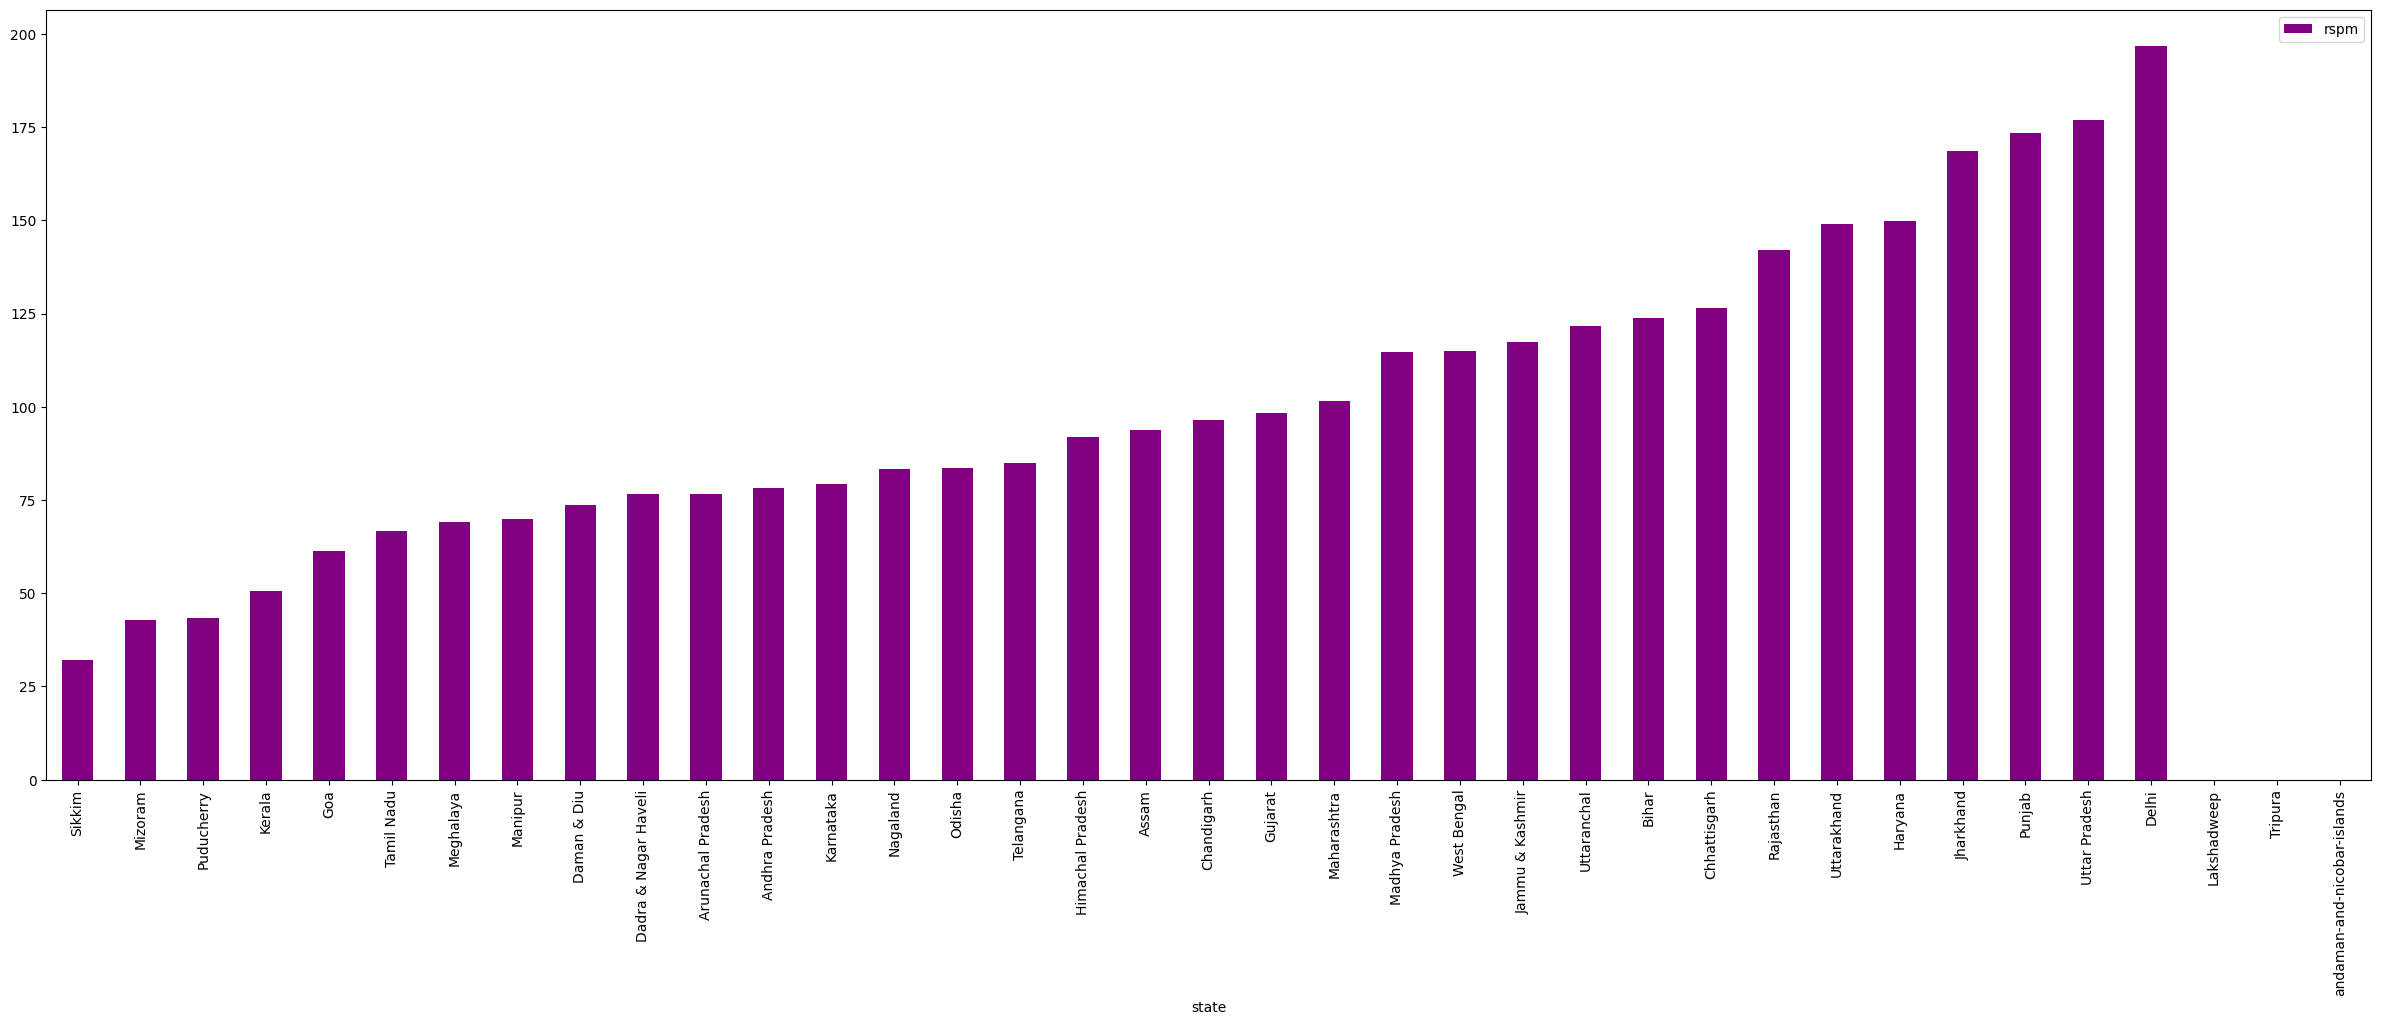

In [19]:
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='purple')
plt.show()

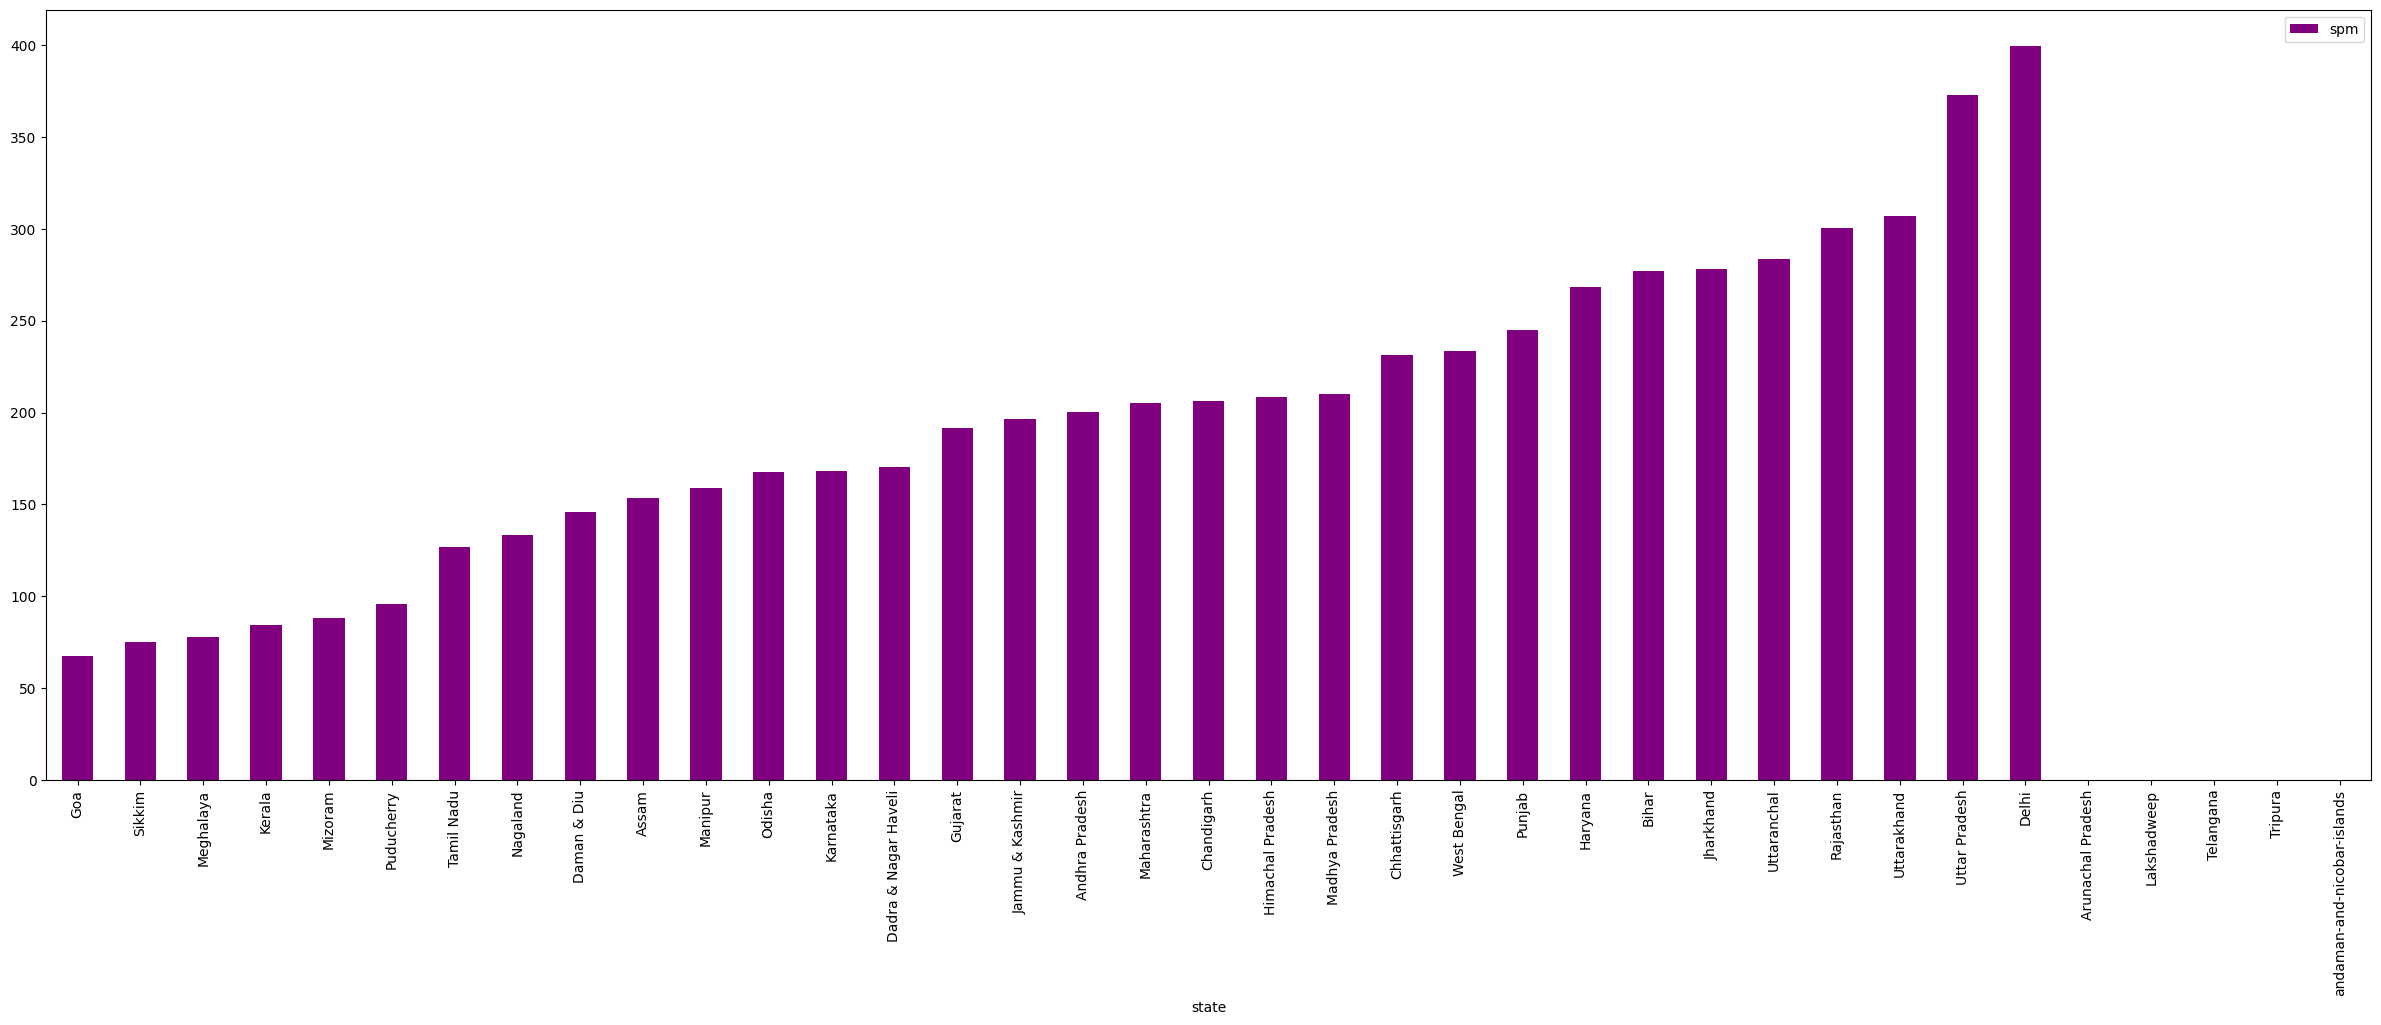

In [20]:
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='purple')
plt.show()

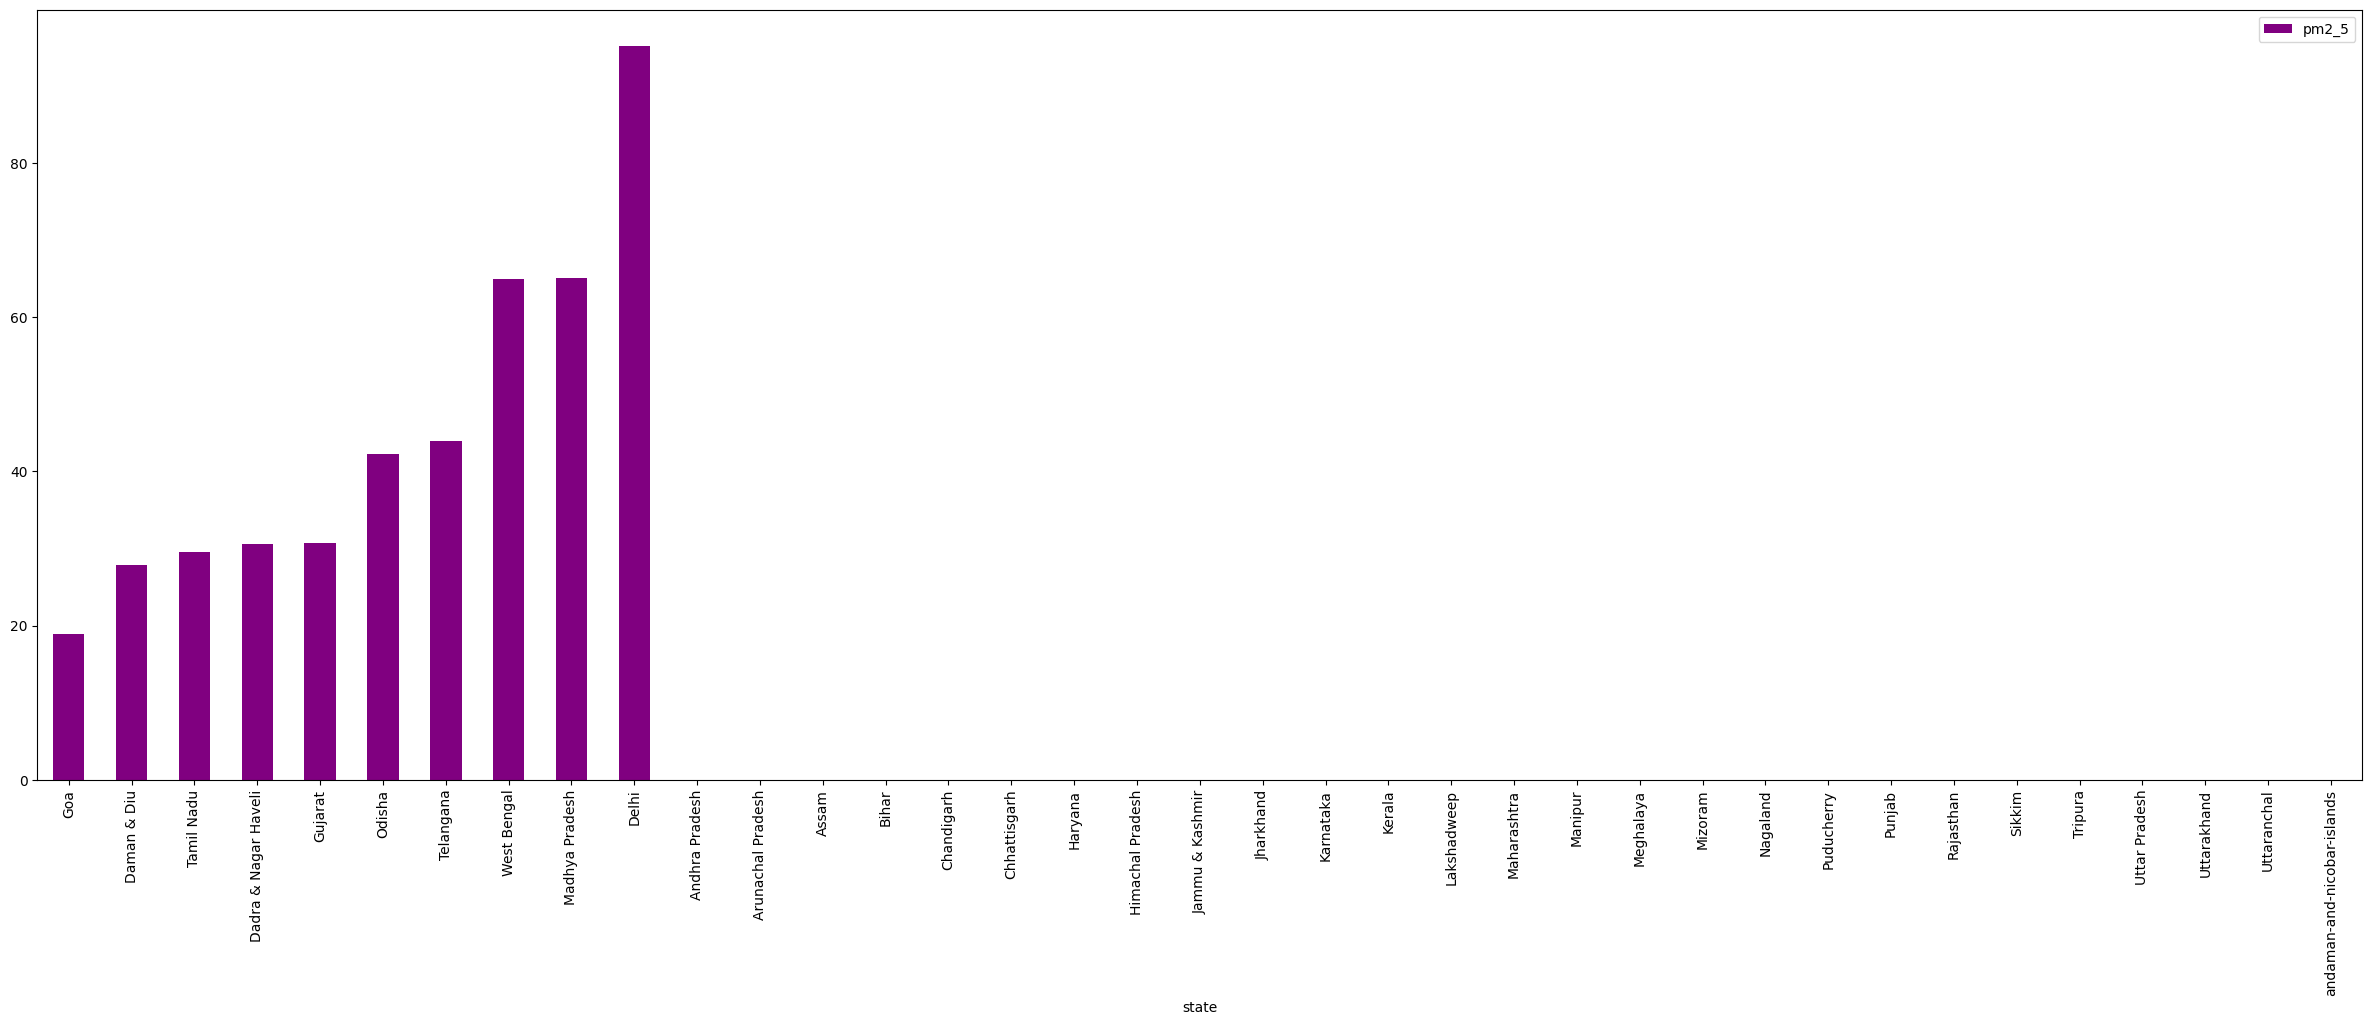

In [21]:
df[['pm2_5','state']].groupby(["state"]).mean().sort_values(by='pm2_5').plot.bar(color='purple')
plt.show()

In [25]:
nullvalues = df.isnull().sum().sort_values(ascending=False)df.drop(['agency'],axis=1,inplace=True)
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage

SyntaxError: invalid syntax (195336291.py, line 1)

In [23]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [24]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [26]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [27]:
df.fillna(0, inplace=True)

In [28]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [29]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


In [30]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [31]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [32]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [33]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [34]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [35]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [36]:
df['AQI_Range'].value_counts()

AQI_Range
Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: count, dtype: int64

In [37]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [38]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


In [40]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [42]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  13.583424938613533
RMSE TestData =  13.672937344789004
--------------------------------------------------
RSquared value on train: 0.9849533579250526
RSquared value on test: 0.9847286394495923


In [43]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [44]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [45]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.2611034611134567e-13
RMSE TestData =  1.2996586330184456
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998620211009563


In [47]:
pollutants = ['SO₂', 'NO₂', 'Suspended Particles']
values = [30, 45, 60]  # Example concentrations

([<matplotlib.patches.Wedge at 0x21cb7518290>,
 [Text(-1.1, -5.721634853309548e-09, 'SO₂'),
  Text(0.19101304051130774, -1.083288520365016, 'NO₂'),
  Text(0.5499999207186962, 0.9526279899359603, 'Suspended Particles')],
 [Text(-0.6, -3.120891738168844e-09, '22.2%'),
  Text(0.10418893118798604, -0.5908846474718268, '33.3%'),
  Text(0.29999995675565244, 0.5196152672377965, '44.4%')])

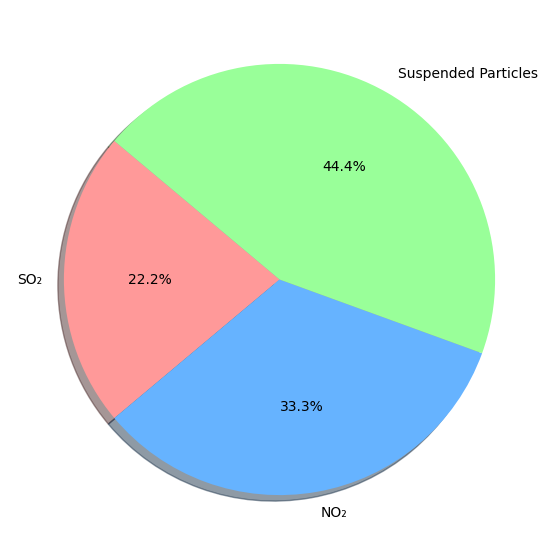

In [48]:
plt.figure(figsize=(7, 7))
plt.pie(values, labels=pollutants, autopct='%1.1f%%', startangle=140, 
        colors=['#ff9999', '#66b3ff', '#99ff99'], shadow=True)


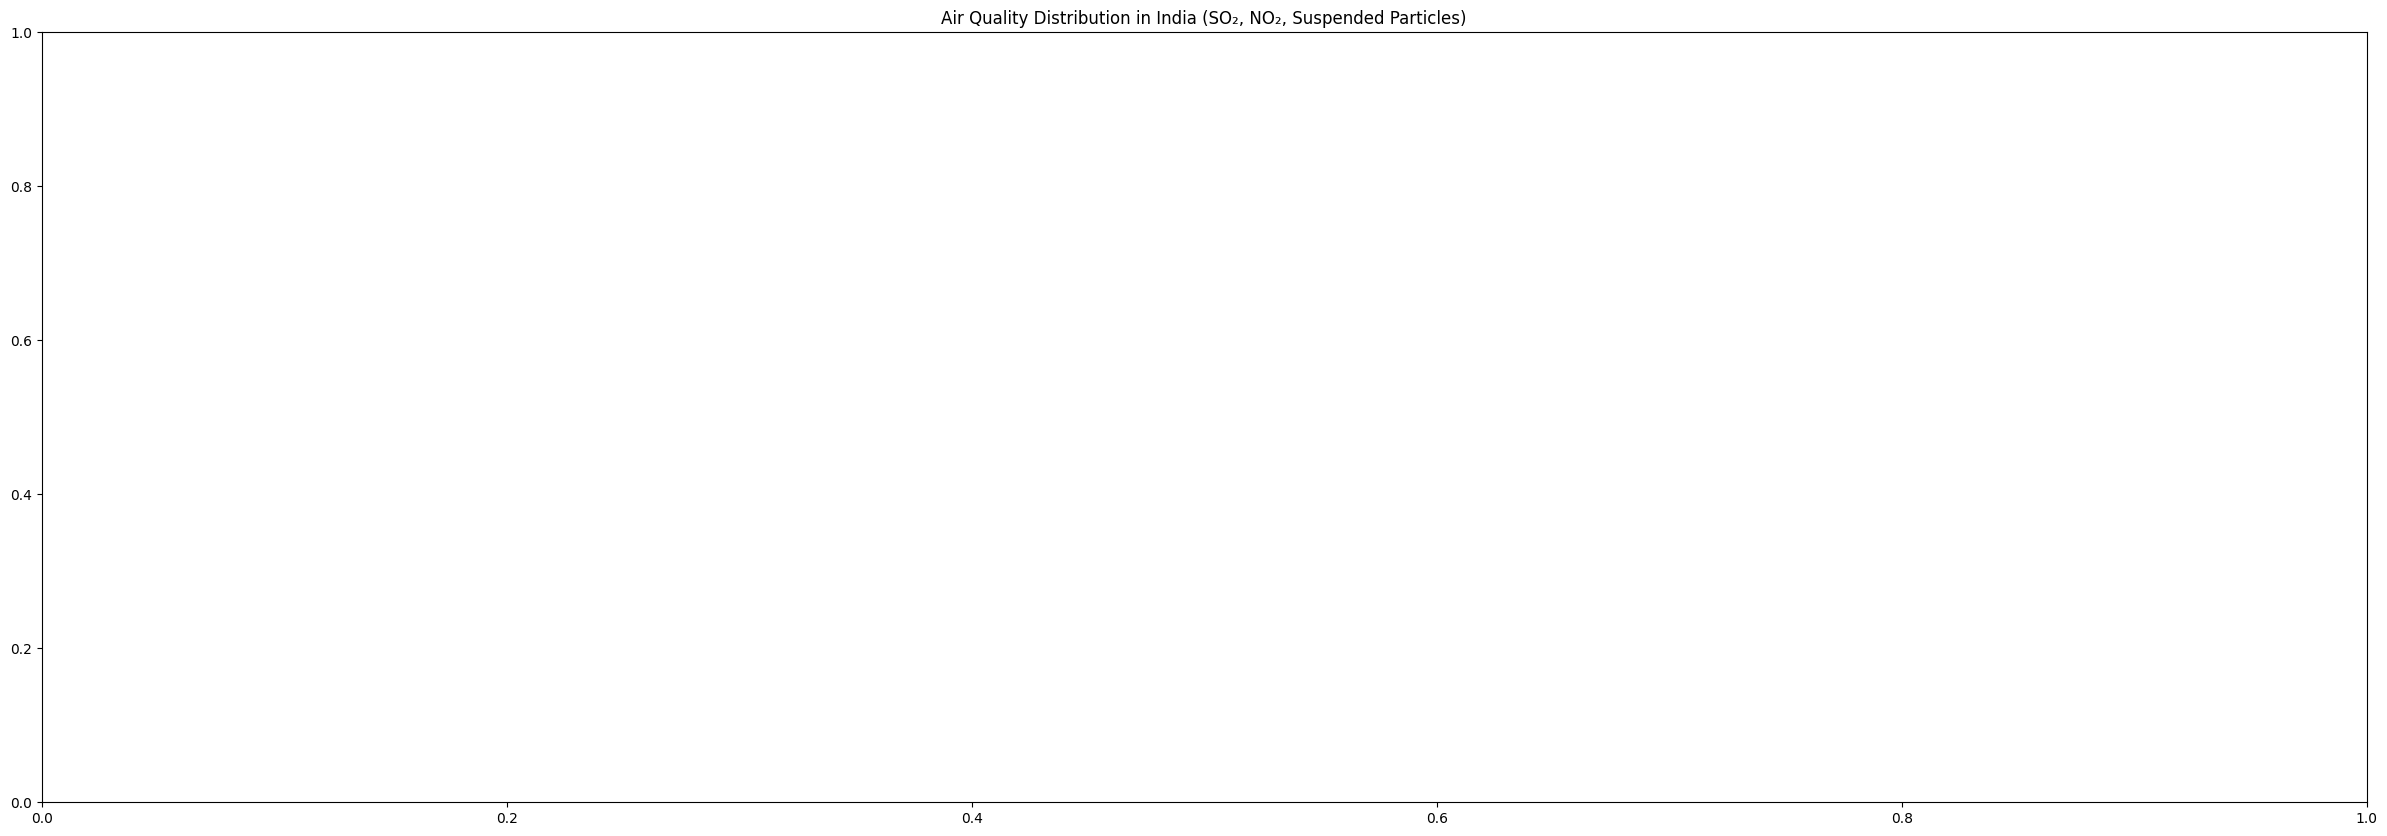

In [49]:
plt.title('Air Quality Distribution in India (SO₂, NO₂, Suspended Particles)')
plt.show()

In [50]:
cities = ["Delhi", "Mumbai", "Chennai", "Kolkata", "Bangalore"]
so2_levels = [20, 15, 12, 18, 10]  # SO2 concentration in µg/m³
no2_levels = [50, 45, 40, 55, 38]  # NO2 concentration in µg/m³
suspended_particles = [90, 85, 80, 88, 82]  # PM levels in µg/m³

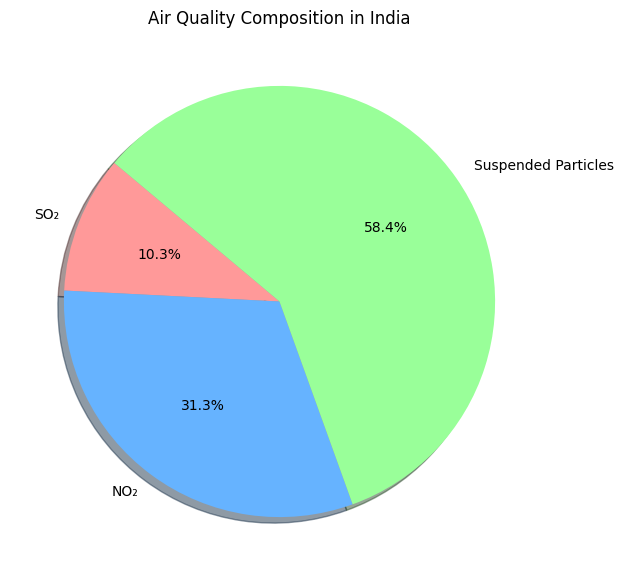

In [51]:
plt.figure(figsize=(7, 7))
pollutants = ['SO₂', 'NO₂', 'Suspended Particles']
values = [np.mean(so2_levels), np.mean(no2_levels), np.mean(suspended_particles)]
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(values, labels=pollutants, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Air Quality Composition in India')
plt.show()

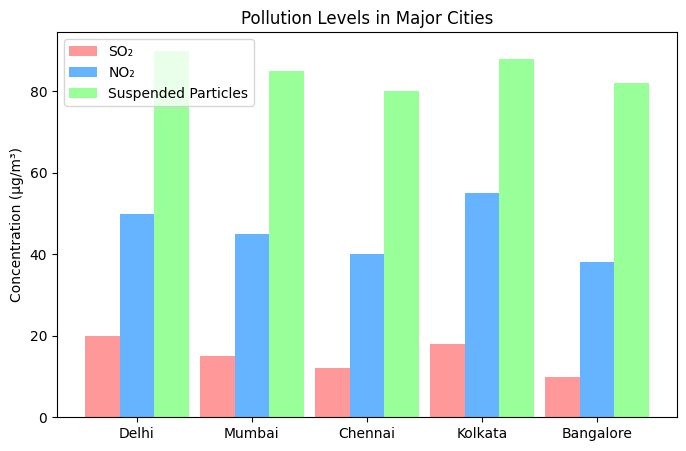

In [52]:
plt.figure(figsize=(8, 5))
x = np.arange(len(cities))
width = 0.3
plt.bar(x - width, so2_levels, width, label='SO₂', color='#ff9999')
plt.bar(x, no2_levels, width, label='NO₂', color='#66b3ff')
plt.bar(x + width, suspended_particles, width, label='Suspended Particles', color='#99ff99')
plt.xticks(x, cities)
plt.ylabel('Concentration (µg/m³)')
plt.title('Pollution Levels in Major Cities')
plt.legend()
plt.show()

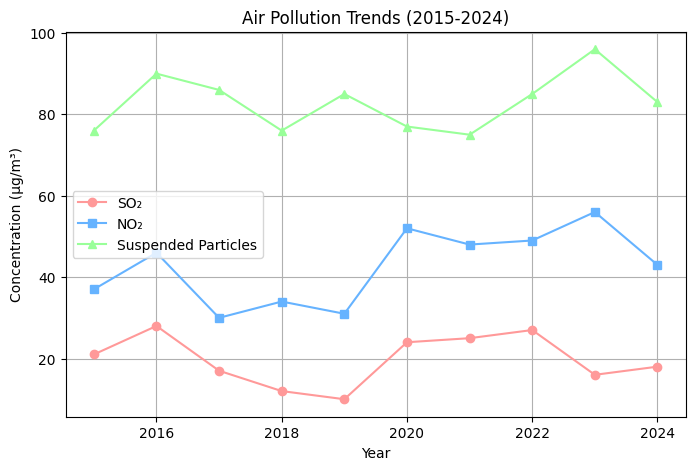

In [53]:
years = np.arange(2015, 2025)
so2_trend = np.random.randint(10, 30, size=len(years))  # Random trend values
no2_trend = np.random.randint(30, 60, size=len(years))
pm_trend = np.random.randint(70, 100, size=len(years))

plt.figure(figsize=(8, 5))
plt.plot(years, so2_trend, marker='o', linestyle='-', label='SO₂', color='#ff9999')
plt.plot(years, no2_trend, marker='s', linestyle='-', label='NO₂', color='#66b3ff')
plt.plot(years, pm_trend, marker='^', linestyle='-', label='Suspended Particles', color='#99ff99')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.title('Air Pollution Trends (2015-2024)')
plt.legend()
plt.grid(True)
plt.show()

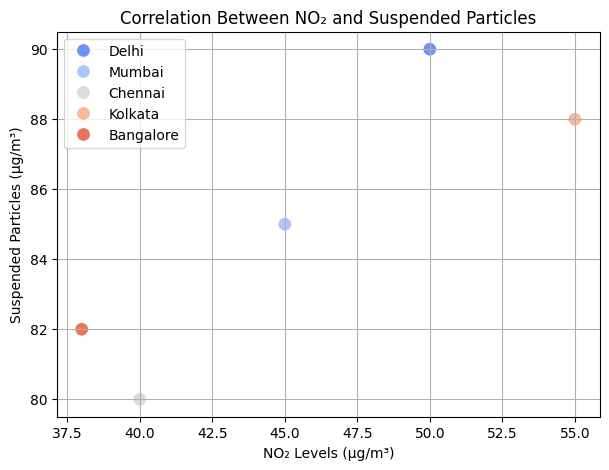

In [54]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=no2_levels, y=suspended_particles, hue=cities, s=100, palette="coolwarm")
plt.xlabel('NO₂ Levels (µg/m³)')
plt.ylabel('Suspended Particles (µg/m³)')
plt.title('Correlation Between NO₂ and Suspended Particles')
plt.grid(True)
plt.show()

In [55]:
data = {
    "State": ["Delhi", "Maharashtra", "Tamil Nadu", "West Bengal", "Karnataka", "Delhi", "Maharashtra"],
    "City": ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bangalore", "Noida", "Pune"],
    "SO2": [25, 15, 12, 18, 10, 20, 14],  # SO2 concentration in µg/m³
    "NO2": [55, 45, 40, 50, 38, 52, 41],  # NO2 concentration in µg/m³
    "PM": [95, 85, 80, 88, 82, 90, 86]    # Suspended Particles (PM10/PM2.5) in µg/m³
}

In [56]:
df = pd.DataFrame(data)

In [57]:
df["Total_Pollution"] = df["SO2"] + df["NO2"] + df["PM"]

In [58]:
most_polluted_city = df.loc[df["Total_Pollution"].idxmax()]
print(f"Most Polluted City: {most_polluted_city['City']} ({most_polluted_city['Total_Pollution']} µg/m³)")


Most Polluted City: New Delhi (175 µg/m³)


In [59]:
state_pollution = df.groupby("State")["Total_Pollution"].mean()
least_polluted_state = state_pollution.idxmin()
print(f"Least Polluted State: {least_polluted_state} (Avg: {state_pollution.min():.2f} µg/m³)")


Least Polluted State: Karnataka (Avg: 130.00 µg/m³)


C:\Users\ankur\AppData\Local\Temp\ipykernel_9516\4167042608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["City"], y=df["Total_Pollution"], palette="Reds_r")


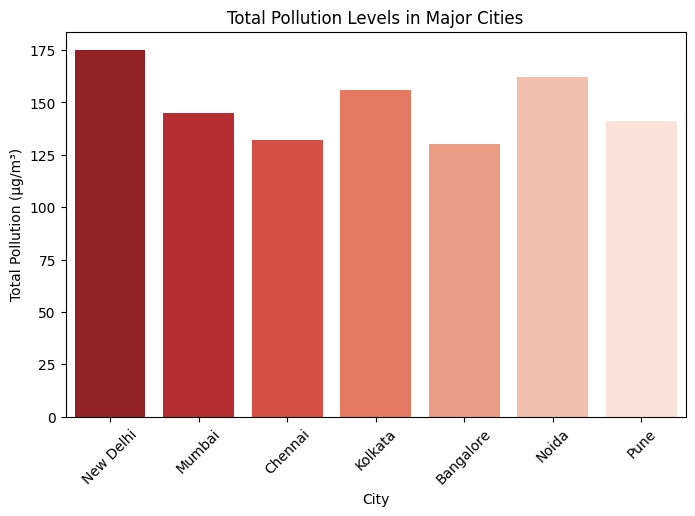

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["City"], y=df["Total_Pollution"], palette="Reds_r")
plt.xlabel("City")
plt.ylabel("Total Pollution (µg/m³)")
plt.title("Total Pollution Levels in Major Cities")
plt.xticks(rotation=45)
plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_9516\1075553596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_pollution.index, y=state_pollution.values, palette="Blues_r")


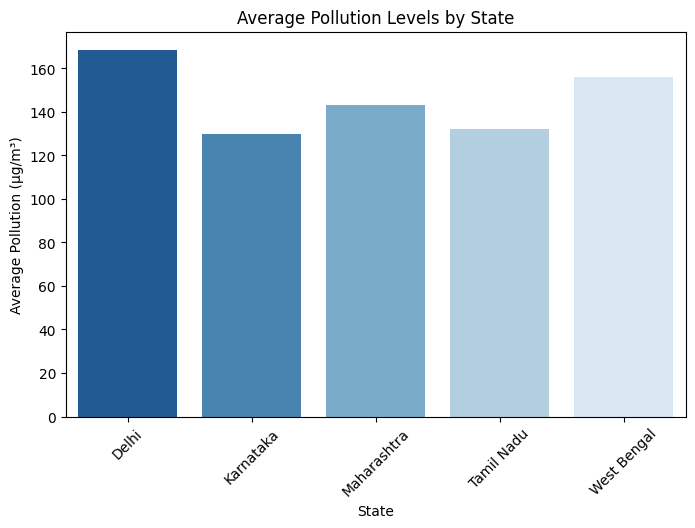

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(x=state_pollution.index, y=state_pollution.values, palette="Blues_r")
plt.xlabel("State")
plt.ylabel("Average Pollution (µg/m³)")
plt.title("Average Pollution Levels by State")
plt.xticks(rotation=45)
plt.show()

In [65]:
# Sample data: Average AQI values for selected states in 2024
states = ['Delhi', 'Uttar Pradesh', 'Bihar', 'Haryana', 'Karnataka']
aqi_values = [491, 350, 320, 300, 100]  # Example AQI values

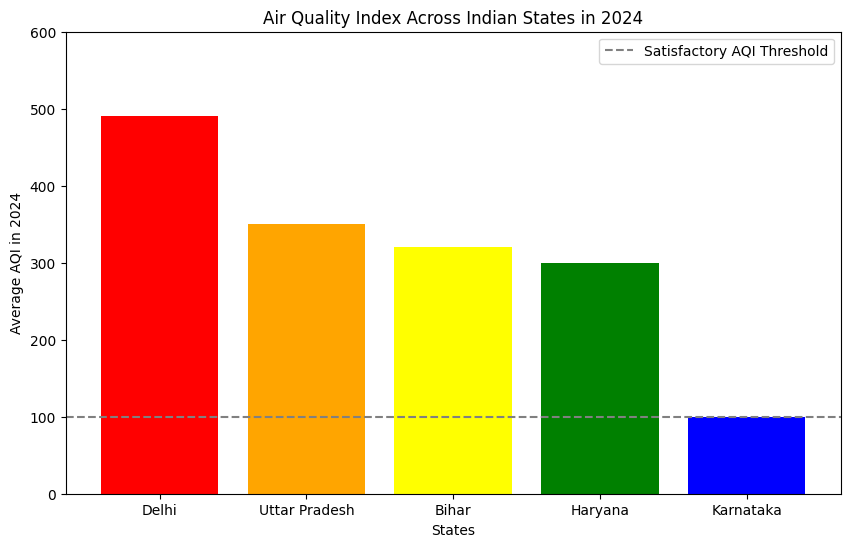

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(states, aqi_values, color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.xlabel('States')
plt.ylabel('Average AQI in 2024')
plt.title('Air Quality Index Across Indian States in 2024')
plt.ylim(0, 600)
plt.axhline(y=100, color='gray', linestyle='--', label='Satisfactory AQI Threshold')
plt.legend()
plt.show()

In [67]:
# Sample data based on available information
data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'AQI': [113, 94, 139, 128, 108]
}

C:\Users\ankur\AppData\Local\Temp\ipykernel_9516\326807734.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='AQI', data=df, palette='viridis')


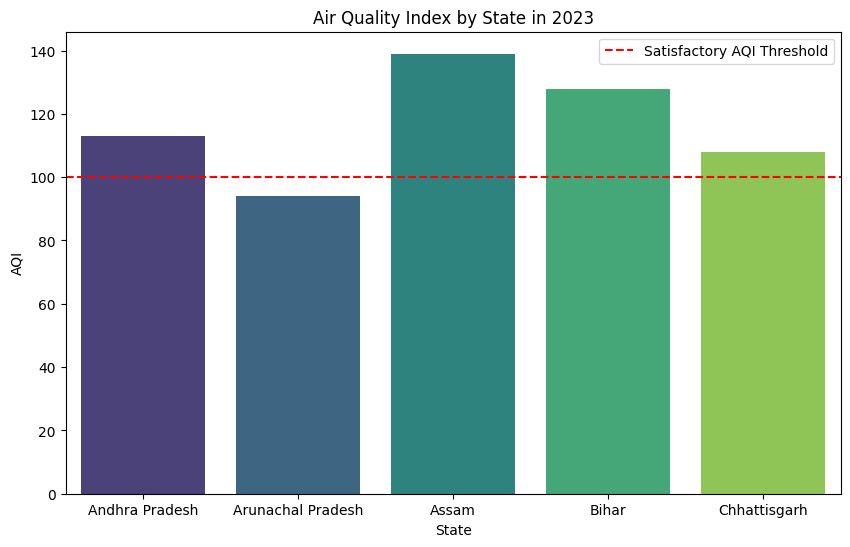

In [68]:
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='AQI', data=df, palette='viridis')
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('Air Quality Index by State in 2023')
plt.axhline(y=100, color='r', linestyle='--', label='Satisfactory AQI Threshold')
plt.legend()
plt.show()

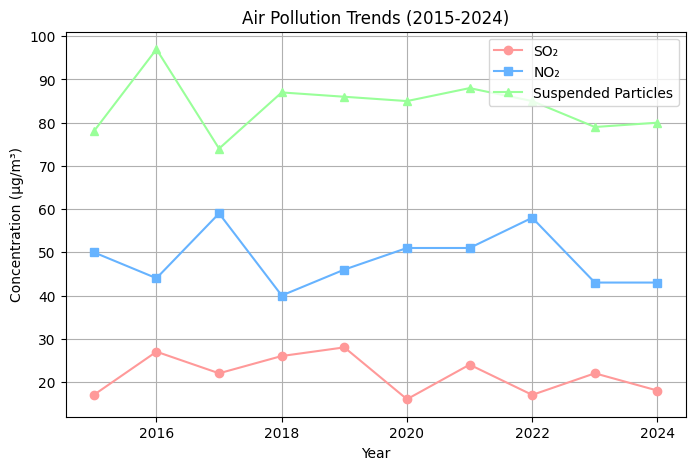

In [69]:
years = np.arange(2015, 2025)
so2_trend = np.random.randint(10, 30, size=len(years))  # Random trend values
no2_trend = np.random.randint(30, 60, size=len(years))
pm_trend = np.random.randint(70, 100, size=len(years))

plt.figure(figsize=(8, 5))
plt.plot(years, so2_trend, marker='o', linestyle='-', label='SO₂', color='#ff9999')
plt.plot(years, no2_trend, marker='s', linestyle='-', label='NO₂', color='#66b3ff')
plt.plot(years, pm_trend, marker='^', linestyle='-', label='Suspended Particles', color='#99ff99')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.title('Air Pollution Trends (2015-2024)')
plt.legend()
plt.grid(True)
plt.show()